In [1]:
import pandas as pd

df = pd.read_csv('../data/heights.csv')
df.head()

,name,height
0,mohan,1.2
1,maria,4.6
2,sakib,4.9
3,tao,5.1
4,virat,5.2


In [2]:
Q1, Q3 = df['height'].quantile([0.25,0.75])

IQR = Q3 - Q1

IQR

0.9249999999999998

In [3]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

upper_bound, lower_bound

(7.6625, 3.962500000000001)

In [4]:
df[df['height'] < lower_bound]

,name,height
0,mohan,1.2


In [5]:
df[df['height']>upper_bound]

,name,height
19,Liu,40.2


In [6]:
df[(df['height']<lower_bound) | (df['height']>upper_bound)]

,name,height
0,mohan,1.2
19,Liu,40.2


In [9]:
df_new = df[(df['height']>lower_bound) & (df['height']<upper_bound)]
df_new

,name,height
1,maria,4.6
2,sakib,4.9
3,tao,5.1
4,virat,5.2
5,khusbu,5.4
6,dmitry,5.5
7,selena,5.5
8,john,5.6
9,imran,5.6
10,jose,5.8


In [ ]:
! pip install openpyxl

In [11]:
df = pd.read_excel('../data/region_wise_sales.xlsx')
df.head()

,Month,Year,Region,Sales
0,January,2022,APAC,36750
1,February,2022,APAC,36995
2,March,2022,APAC,18579
3,April,2022,APAC,37768
4,May,2022,APAC,23956


In [12]:
df['Region'].unique()

array(['APAC', 'Europe', 'Americas'], dtype=object)

In [13]:
df_apac = df[df['Region'] == "APAC"]
df_europe = df[df['Region'] == "Europe"]
df_americas = df[df['Region'] == "Americas"]

In [35]:
def get_low_up(data):
    Q1, Q3 = data['Sales'].quantile([0.25,0.75])
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR
    return upper_bound, lower_bound

In [36]:
upper_apac, lower_apac = get_low_up(df_apac)
upper_europe, lower_europe = get_low_up(df_europe)
upper_americas, lower_americas = get_low_up(df_americas)

In [37]:
upper_apac,lower_apac

(59747.875, -737.125)

In [38]:
df_apac['Sales'].describe()

count       12.000000
mean     29762.166667
std       7725.522905
min      18579.000000
25%      21944.750000
50%      31215.500000
75%      37066.000000
max      38143.000000
Name: Sales, dtype: float64

In [39]:
upper_europe, lower_europe 

(17665.875, 7306.875)

In [40]:
df_europe.Sales.describe()

count       12.000000
mean     13147.583333
std       3549.568795
min       9665.000000
25%      11191.500000
50%      12044.000000
75%      13781.250000
max      23000.000000
Name: Sales, dtype: float64

Here we have an outlier because upper bound is 17665 but the max is 23000

In [41]:
df_europe[df_europe['Sales'] > upper_europe]

,Month,Year,Region,Sales
21,October,2022,Europe,23000


In [42]:
upper_americas, lower_americas

(38473.375, 16832.375)

In [43]:
df_americas['Sales'].describe()

count       12.000000
mean     28356.750000
std       3610.368556
min      23407.000000
25%      24947.750000
50%      28770.500000
75%      30358.000000
max      34102.000000
Name: Sales, dtype: float64

In [45]:
labels = df['Region'].unique()
labels

array(['APAC', 'Europe', 'Americas'], dtype=object)

In [47]:
plot_data = [df['Sales'][df['Region']==label].values for label in labels]
plot_data

[array([36750, 36995, 18579, 37768, 23956, 38143, 29132, 21961, 33299,
        37279, 21388, 21896]),
 array([ 9665, 10297, 11079, 13410, 11229, 15352, 13286, 11470, 11873,
        23000, 12215, 14895]),
 array([30247, 29284, 27904, 23407, 23716, 25077, 33649, 24560, 34102,
        28257, 30691, 29387])]

<Axes: xlabel='Region', ylabel='Sales'>

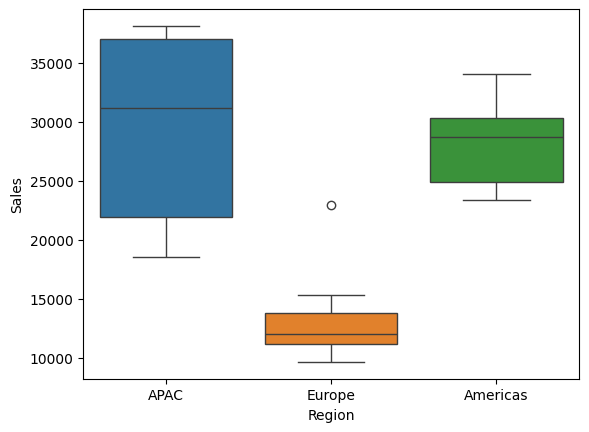

In [49]:
import seaborn as sns

sns.boxplot(data=df,x='Region',y='Sales',hue='Region')